## Enviroment

In [ ]:
import os
print(os.getcwd())
try:
    os.chdir('../../Workshop001_Data_Engineering/')
except FileNotFoundError:
    print("""
        Posiblemente ya ejecutaste este bloque dos o más veces o tal vez el directorio está incorrecto. 
        ¿Ya ejecutaste este bloque antes y funcionó? Recuerda no ejecutarlo de nuevo. 
        ¿Estás en el directorio incorrecto? Puedes cambiarlo. 
        Recuerda el directorio donde estás:
        """)
print(os.getcwd())

Necesitamos editar el workdir, pues el directorio de trabajo está en ../../Workshop001_Data_Engineering/notebooks, lo que hace que, para él, no exista el paquete database (que si lo vemos de forma más detallada, sería que más o menos este buscando el paquete database dentro de la carpeta notebooks, cosa que no existe)

## Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from function.database.database import create_engine_postgres

## Extraction

In [5]:
engine = create_engine_postgres()
query = 'SELECT * FROM candidates_cleaned'
df = pd.read_sql_query(query, engine)
df.head(4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   First Name                 50000 non-null  object        
 1   Last Name                  50000 non-null  object        
 2   Email                      50000 non-null  object        
 3   Application Date           50000 non-null  datetime64[ns]
 4   Country                    50000 non-null  object        
 5   YOE                        50000 non-null  int64         
 6   Seniority                  50000 non-null  object        
 7   Technology                 50000 non-null  object        
 8   Code Challenge Score       50000 non-null  int64         
 9   Technical Interview Score  50000 non-null  int64         
 10  is_hired                   50000 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 4.2+ MB


## Data EDA - Cleaned

In [6]:
print(df.nunique())


First Name                    3007
Last Name                      474
Email                        49833
Application Date              1646
Country                        244
YOE                             31
Seniority                        7
Technology                      24
Code Challenge Score            11
Technical Interview Score       11
is_hired                         2
dtype: int64


### Agregar la columna is_hired_INT para analisis:

In [7]:
df['is_hired_INT'] = df['is_hired'].replace({'Hired':1, 'Not Hired':0})

C:\Users\juanr\AppData\Local\Temp\ipykernel_25580\589497698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_hired_INT'] = df['is_hired'].replace({'Hired':1, 'Not Hired':0})


### Busco reemplazar los valores de las columnas 'Seniority' y 'Technology' de tipo String a Int para realizar un analisis de correlación, ya que sería interesante ver si influye el seniority y el titulo en la efectividad que tiene el postulado en el puntaje de la prueba:

In [8]:
print(df['Technology'].unique())
print('--------------------------------')
print(df['Seniority'].unique())

['Data Engineer' 'Client Success' 'QA Manual'
 'Social Media Community Management' 'Adobe Experience Manager' 'Sales'
 'Mulesoft' 'DevOps' 'Development - CMS Backend' 'Salesforce'
 'System Administration' 'Security' 'Game Development'
 'Development - CMS Frontend' 'Security Compliance'
 'Development - Backend' 'Design'
 'Business Analytics / Project Management' 'Development - Frontend'
 'Development - FullStack' 'Business Intelligence'
 'Database Administration' 'QA Automation' 'Technical Writing']
--------------------------------
['Intern' 'Mid-Level' 'Trainee' 'Junior' 'Lead' 'Architect' 'Senior']


In [9]:
df['Seniority_INT'] = df['Seniority'].replace({'Intern':1, 'Mid-Level':2, 'Trainee':3, 'Junior':4, 'Lead':5, 'Architect':6, 'Senior':7})
df['Technology_INT'] = df['Technology'].replace(
    {
  "Data Engineer": 1,
  "Client Success": 2,
  "QA Manual": 3,
  "Social Media Community Management": 4,
  "Adobe Experience Manager": 5,
  "Sales": 6,
  "Mulesoft": 7,
  "DevOps": 8,
  "Development - CMS Backend": 9,
  "Salesforce": 10,
  "System Administration": 11,
  "Security": 12,
  "Game Development": 13,
  "Development - CMS Frontend": 14,
  "Security Compliance": 15,
  "Development - Backend": 16,
  "Design": 17,
  "Business Analytics / Project Management": 18,
  "Development - Frontend": 19,
  "Development - FullStack": 20,
  "Business Intelligence": 21,
  "Database Administration": 22,
  "QA Automation": 23,
  "Technical Writing": 24
}
)


C:\Users\juanr\AppData\Local\Temp\ipykernel_25580\1454189351.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Seniority_INT'] = df['Seniority'].replace({'Intern':1, 'Mid-Level':2, 'Trainee':3, 'Junior':4, 'Lead':5, 'Architect':6, 'Senior':7})
C:\Users\juanr\AppData\Local\Temp\ipykernel_25580\1454189351.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Technology_INT'] = df['Technology'].replace(


### Rectificamos si hay valores atipicos después de la limpieza y la creación de la columna 'is_hired'

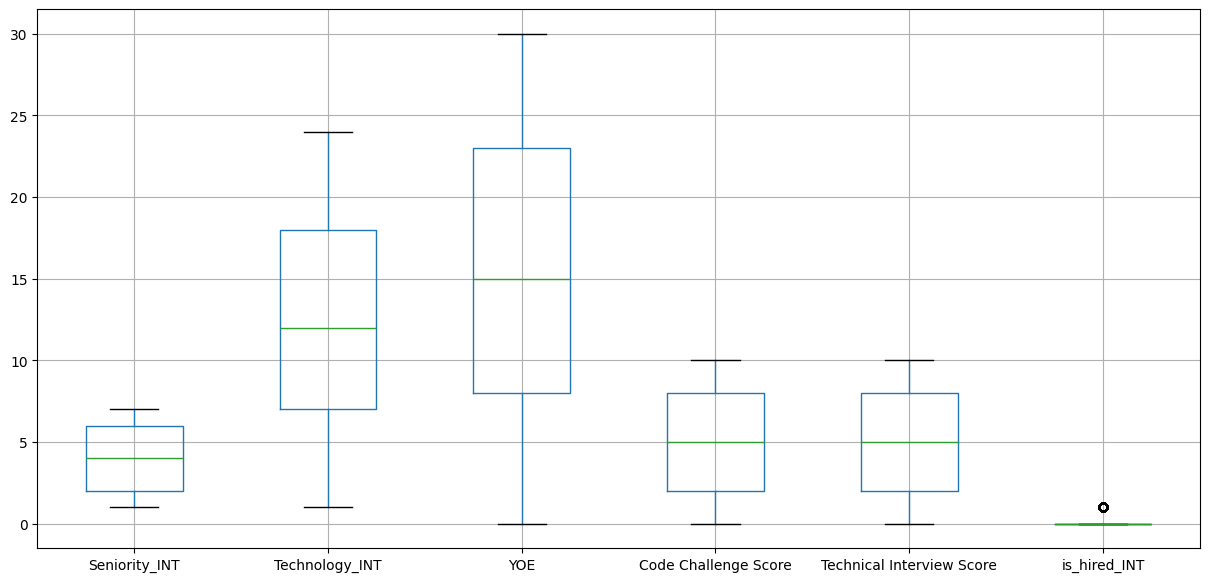

In [10]:
fig = plt.figure(figsize =(15, 7))
boxplot = df.boxplot(column=['Seniority_INT', 'Technology_INT', 'YOE', 'Code Challenge Score', 'Technical Interview Score', 'is_hired_INT'])
plt.show()

<Axes: xlabel='is_hired_INT'>

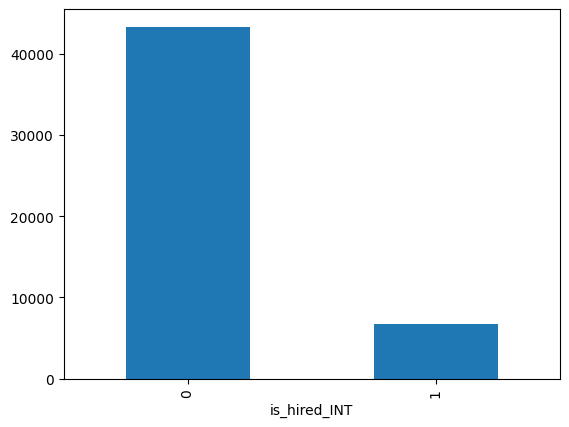

In [11]:
df['is_hired_INT'].value_counts().plot(kind='bar')

El boxplot anterior podría significar que, los contratados en comparación a los que se presentaron a la prueba son muy pocos, y para profundizar en esto, vemos en el gráfico de barras que efectivamente podría ser cierto, por lo cuál no tenemos que eliminar estos datos atipicos que son fundamentales para hacer un analisis de valor sobre contratados vs no contratados

### Realizamos un heatmap

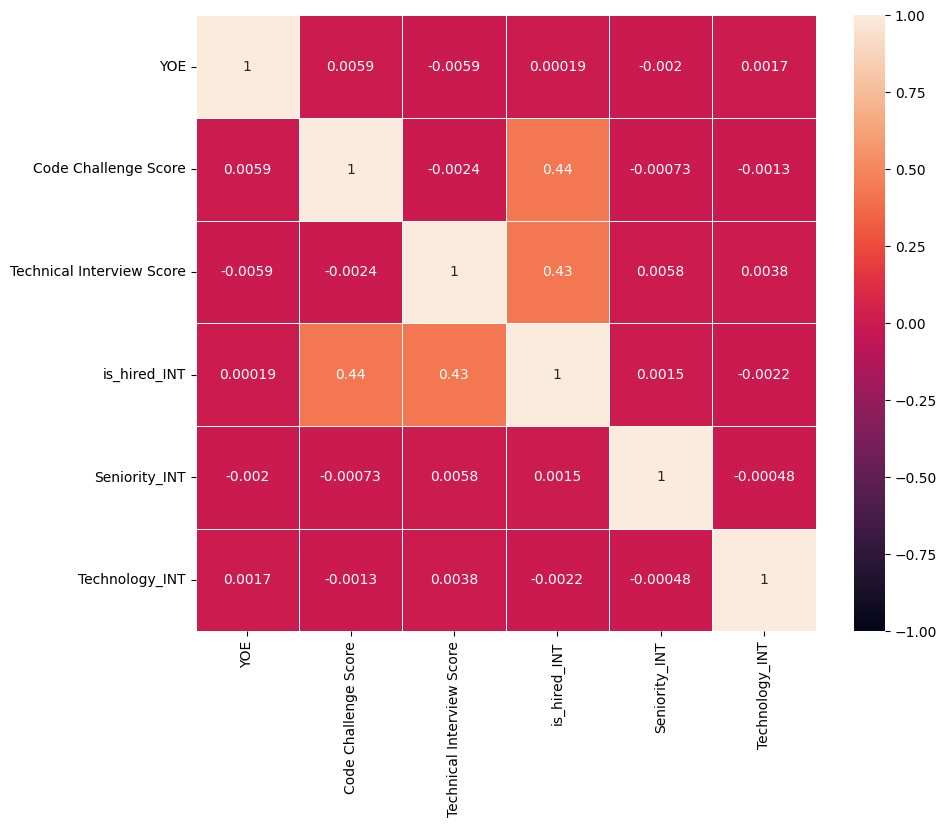

In [12]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, linewidth=.5, vmin=-1, vmax=1)
plt.show()

Como podemos observar, no existe una correlación significativa entre las variables de nuestro dataframe, salvo la correlación entre Code Challenge Score, Technical Interview Score y is_hired_INT, que es un poco redundante, pues los que obtienen puntajes mayor o igual a 7 de las dos primeras variables anteriores es contratado, sin importar si sacó más puntaje que eso. Podríamos eliminar Seniority_INT, Technology_INT y is_hired_INT, ya que fueron variables temporales sin éxito para el analisis de correlación

In [13]:
df.drop(columns=['Seniority_INT', 'Technology_INT', 'is_hired_INT'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   First Name                 50000 non-null  object        
 1   Last Name                  50000 non-null  object        
 2   Email                      50000 non-null  object        
 3   Application Date           50000 non-null  datetime64[ns]
 4   Country                    50000 non-null  object        
 5   YOE                        50000 non-null  int64         
 6   Seniority                  50000 non-null  object        
 7   Technology                 50000 non-null  object        
 8   Code Challenge Score       50000 non-null  int64         
 9   Technical Interview Score  50000 non-null  int64         
 10  is_hired                   50000 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 4.2+ MB
